In [253]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

In [254]:
def RBF(x1,x2,*,length_scale=1.0):
    return np.exp(-0.5/length_scale**2 * (x1-x2)**2)

def dRBF(x1,x2,*,length_scale=1.0):
    return (x2-x1)/length_scale**2 * RBF(x1,x2,length_scale=length_scale)

def ddRBF(x1,x2,*,length_scale=1.0):
    return (1 - (x1-x2)**2 / length_scale**2) / length_scale**2 * RBF(x1,x2,length_scale=length_scale)

In [255]:
def func(x,*,noise=0.0):
    return np.sin(x) + noise*np.random.randn(*x.shape)

def grad_func(x,*,noise=0.0):
    return np.cos(x) + noise*np.random.randn(*x.shape)

In [256]:
bounds = np.array([0.0, np.pi])

noise = 0.1

length_scale = 3

num_datapoints = 5
datagrid = np.linspace(*bounds,num_datapoints)

num_gridpoints = 101
grid = np.linspace(*bounds,num_gridpoints)

In [257]:
def covMatrix(points,*,length_scale=1.0,alpha=1e-6):
    xs,ys = np.meshgrid(points,points,sparse=True)
    mat = RBF(xs,ys,length_scale=length_scale)
    
    return mat + np.eye(len(points))*alpha

def dcovMatrix(points,*,length_scale=1.0,alpha=1e-6):
    xs,ys = np.meshgrid(points,points,sparse=True)
    mat = dRBF(xs,ys,length_scale=length_scale)
    
    return mat + np.eye(len(points))*alpha

def ddcovMatrix(points,*,length_scale=1.0,alpha=1e-6):
    xs,ys = np.meshgrid(points,points,sparse=True)
    mat = ddRBF(xs,ys,length_scale=length_scale)
    
    return mat + np.eye(len(points))*alpha

In [258]:
data_values = func(datagrid,noise=noise)
derivative_values = grad_func(datagrid,noise=noise)

In [259]:
temp_values = solve(covMatrix(datagrid,length_scale=length_scale,alpha=noise**2),data_values)
temp_derivatives = solve(ddcovMatrix(datagrid,length_scale=length_scale,alpha=noise**2),data_values)

deriv_pred = np.array([RBF(x,datagrid,length_scale=length_scale)@temp_derivatives for x in grid])
values_pred = np.array([RBF(x,datagrid,length_scale=length_scale)@temp_values for x in grid])

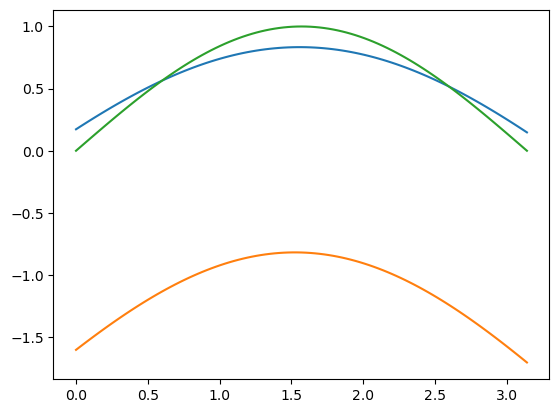

In [260]:
plt.plot(grid,values_pred)
plt.plot(grid,deriv_pred)
plt.plot(grid,func(grid))